**Project objective** is to figure out how the living conditions of students aged 15-22 y.o. influence their math scores, to identify students in risk group on early stages. It can be done with the help of a model, which will predict the results of math state exam for each student of a school. 

**Project tasks** - EDA and report based on its results, including the following steps:
1. Data overview. Libraries and functions
2. Numeric variables: distribution analysis and deleting the outliers
3. Nominative variables: number of unique values
4. Prepare data for modeling
5. Numeric variables: correlation analysis and selection of correlating columns
6. Nominative variables: analyzing and choosing those, which probably influence the predicted value (the score)
7. Conclusions about data quality and variables, which will be used for futher modeling

# Data overview. Libraries and functions

Importing libraries:

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

Functions used in this notebook:

In [378]:
pd.set_option('display.max_columns', 50)  # show more columns


# to count quantiles, IQR and outliers
def outlier(column):
    perc25 = students[column].quantile(0.25)
    perc75 = students[column].quantile(0.75)
    IQR = perc75 - perc25
    return ('25%: {},'.format(perc25), '75%: {},'.format(perc75), "IQR: {}, ".format(IQR),
            "Outlier bounds: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


# to count number of unique values in a column
def unique_count(column):
    return pd.DataFrame(students[column].value_counts(dropna=False))


# to count number of unique values in a column in percent
def unique_count_perc(column):
    return pd.DataFrame(students[column].value_counts(dropna=False, normalize=True))


# to fill NaN values by median value of a column
def nan_to_median(column):
    students[column].fillna(students[column].median(), inplace=True)

    
# to build a boxplot for a column
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# to identify statistically significant difference for column, using t-test
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Bonferonni adjustment
            print('There is statistically significant difference for column', column)
            break

Data loading and overview

**Dataset guide:**

1. school — short name of a school, attended by a student
2. sex — 'F' - female, 'M' - male
3. age — age of student (from 15 to 22)
4. address — address type ('U' - urban, 'R' - outside town)
5. famsize — family size ('LE3' <= 3, 'GT3' >3)
6. Pstatus — status of parents co-living ('T' - together, 'A' - aside)
7. Medu — mother's education (0 - no, 1 - 4 classes, 2 - 5-9 classes, 3 - vocational secondary or 11 classes, 4 - higher)
8. Fedu — father's education (0 - no, 1 - 4 classes, 2 - 5-9 classes, 3 - vocational secondary or 11 classes, 4 - higher)
9. Mjob — mother's job ('teacher', 'health', 'services' - state service, 'at_home' - don't work, 'other')
10. Fjob — father's job ('teacher', 'health', 'services' - state service, 'at_home' - don't work, 'other')
11. reason — for school choice ('home' - close to home, 'reputation' - of school, 'course' - education program, 'other')
12. guardian — 'mother', 'father', 'other'
13. traveltime — time to get to school (1 - <15 min., 2 - 15-30 min., 3 - 30-60 min., 4 - >60 min.)
14. studytime — learning time outside school, per week (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 - >10 hours)
15. failures — number of nonlearning failures (n, if 1<=n<=3, else 0)
16. schoolsup — additional studying support (yes or no)
17. famsup — family educational support (yes or no)
18. paid — additional paid math studies (yes or no)
19. activities — additional nonlearning activities (yes or no)
20. nursery — attended nursery (yes or no)
21. higher — wishes to get higher education (yes or no)
22. internet — at home (yes or no)
23. romantic — romantic relationships (yes or no)
24. famrel — family relationships (from 1 - very bad to 5 - excellent)
25. freetime — after school (from 1 - not enough to 5 - much)
26. goout — going out with friends (from 1 - not enough to 5 - much)
27. health — current health status (from 1 - very bad to 5 - excellent)
28. absences — number of missed studies
29. score — for math state exam

In [304]:
students = pd.read_csv('stud_math.csv')
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

So dataset contains 395 rows and 30 columns (including 17 categorical and 13 numerical).

In [157]:
print(f'There are {students.isnull().any().sum()} columns in students dataset with missing values.')

There are 27 columns in students dataset with missing values.


27 of 30 columns have missing data.

# Numeric variables: distribution analysis and deleting the outliers

## age

Age is the only numerical variable without missing values. Let's check for the outliers:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

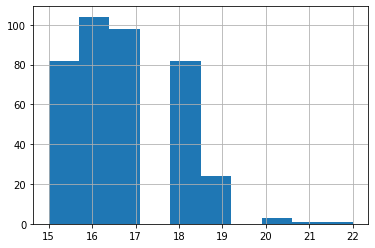

In [305]:
students.age.hist()
students.age.describe()

Age data is correct: values differ from 15 to 22 as they should. Agerage age of students equals 17. 

## Medu (mother's education, from 0 to 4)

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

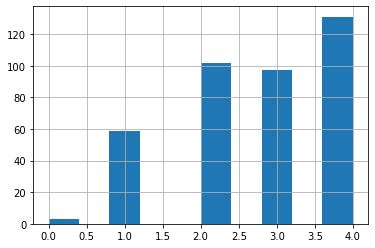

In [306]:
students.Medu.hist()
students.Medu.describe()

Values in Medu column look good, no outliers. Median value is 3 - meaning vocational secondary education.

In [307]:
unique_count('Medu')

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


Let's replace NaN values by median:

In [308]:
nan_to_median('Medu')

## Fedu (father's education, from 0 to 4)

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

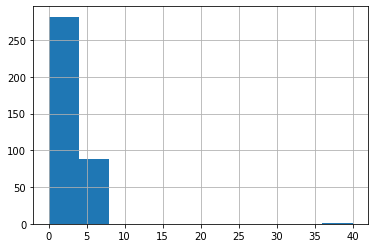

In [309]:
students.Fedu.hist()
students.Fedu.describe()

There are definitely some outliers in this column. Let' check the number of outlying values in this column:

In [310]:
unique_count('Fedu')

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


Just one value, let's delete this row:

In [311]:
students = students.drop(np.where(students['Fedu'] == 40)[0])

Let's replace NaN values by median:

In [312]:
nan_to_median('Fedu')

And check the distribution again:

count    394.000000
mean       2.482234
std        1.060961
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

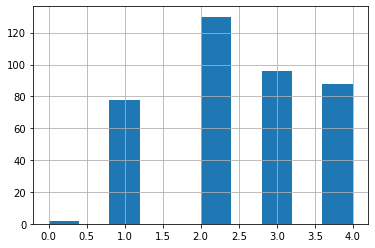

In [313]:
students.Fedu.hist()
students.Fedu.describe()

Median education of fathers is lower than median education of mothers. 

## traveltime (time of travel to school, from 1 to 4)

count    366.000000
mean       1.434426
std        0.690297
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

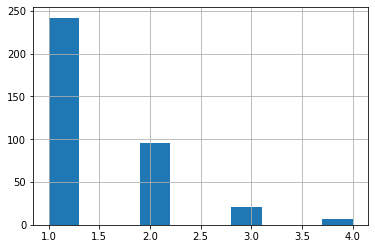

In [314]:
students.traveltime.hist()
students.traveltime.describe()

Most of students spent less than 15 minutes to get to school. No outliers in this column. Let's replace NaN values by median:

In [315]:
nan_to_median('traveltime')

## studytime (learning time outside school, per week,  from 1 to 4)

count    387.000000
mean       2.036176
std        0.841744
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

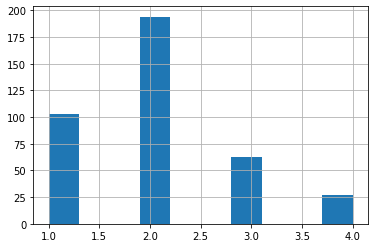

In [316]:
students.studytime.hist()
students.studytime.describe()

In [317]:
unique_count_perc('studytime')

,studytime
2.0,0.492386
1.0,0.261421
3.0,0.159898
4.0,0.068528
NaN,0.017766


Half of students spend from 2 to 5 hours a week for learning outside school. No outliers in this column. But there are NaN values, which we replace by median:

In [318]:
nan_to_median('studytime')

## failures (number of nonlearning failures, n if 1<=n<=3, else 0)

count    372.000000
mean       0.338710
std        0.743929
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

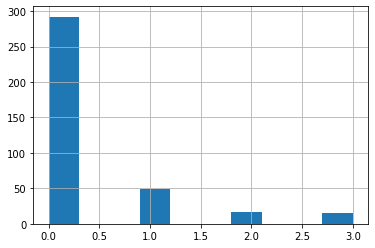

In [319]:
students.failures.hist()
students.failures.describe()

Majority of students have zero nonlearning failures, let's replace NaN values with the most common answer - 0.

In [320]:
students.failures.fillna(0, inplace=True)

## studytime, granular

There is no such column in the guide for this dataset. Let's see the values it includes:

In [321]:
unique_count('studytime, granular')

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,63
-12.0,27
NaN,7


In [322]:
unique_count('studytime')

,studytime
2.0,201
1.0,103
3.0,63
4.0,27


Looks like it's a duplicate of studytime column just with different values. The same number of counts for each value (taking into account that we've already changed the NaN values for 2 in studytime):

In [323]:
students.groupby(['studytime', 'studytime, granular'])['score'].sum()

studytime  studytime, granular
1.0        -3.0                   5095.0
2.0        -6.0                   9605.0
3.0        -9.0                   3580.0
4.0        -12.0                  1520.0
Name: score, dtype: float64

count    387.000000
mean      -6.108527
std        2.525231
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

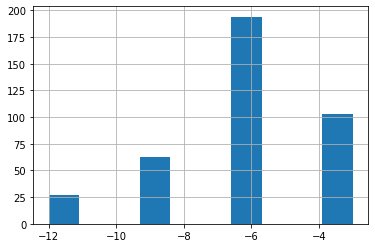

In [324]:
students['studytime, granular'].hist()
students['studytime, granular'].describe()

Values look good but as we don't know, how to use them, let's delete this column:

In [325]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

## famrel (family relationships, from 1 to 5)

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

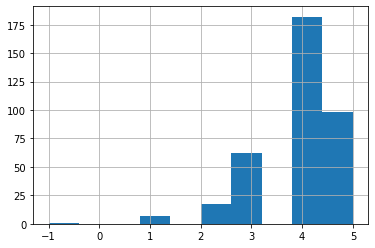

In [326]:
students.famrel.hist()
students.famrel.describe()

Numbers should start from 1, but there is a -1 value on histogram, might be a misprint.

In [327]:
unique_count_perc('famrel')

,famrel
4.0,0.461929
5.0,0.248731
3.0,0.157360
NaN,0.068528
2.0,0.043147
1.0,0.017766
-1.0,0.002538


Over 70% of students have good or very good relationships in the family. Let's delete a row with outlier value and replace NaN values with median:

In [328]:
students = students.loc[students['famrel'] != -1.0]

In [329]:
nan_to_median('famrel')

In [330]:
unique_count('famrel')

,famrel
4.0,209
5.0,98
3.0,62
2.0,17
1.0,7


## freetime (after school, from 1 to 5)

count    382.000000
mean       3.238220
std        0.992521
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

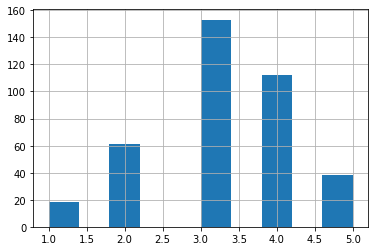

In [331]:
students.freetime.hist()
students.freetime.describe()

In [332]:
unique_count_perc('freetime')

,freetime
3.0,0.389313
4.0,0.284987
2.0,0.155216
5.0,0.096692
1.0,0.045802
NaN,0.027990


39% of students have medium amount of free time. Let's replace the NaN values with median value:

In [333]:
nan_to_median('freetime')

## goout (going out with friends, from 1 to 5)

count    385.000000
mean       3.111688
std        1.115933
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

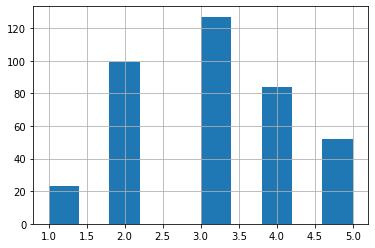

In [334]:
students.goout.hist()
students.goout.describe()

Majority of students estimated the amount of time spent with friends as 3 in 1 to 5 scale. No outliers in the column values.

In [335]:
unique_count('goout')

,goout
3.0,127
2.0,99
4.0,84
5.0,52
1.0,23
NaN,8


Let's replace the NaN values with median:

In [336]:
nan_to_median('goout')

## health (current health status, from 1 to 5)

count    378.000000
mean       3.526455
std        1.397455
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

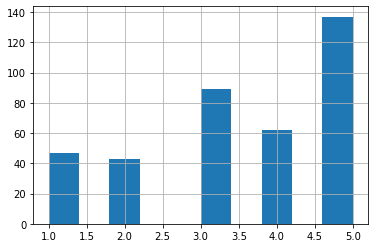

In [337]:
students.health.hist()
students.health.describe()

In [338]:
unique_count('health')

,health
5.0,137
3.0,89
4.0,62
1.0,47
2.0,43
NaN,15


Only 34% of students estimated their health condition as excellent. 12% of students marked their health as 'very bad'. Let's replace the NaN values with median:

In [339]:
nan_to_median('health')

## absences (number of missed studies)

count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

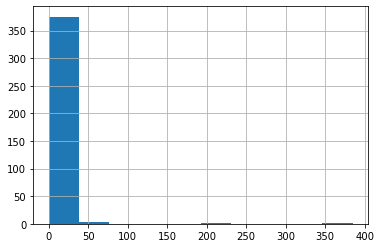

In [340]:
students.absences.hist()
students.absences.describe()

Let's count the outlier bounds using the IQR method:

In [341]:
outlier('absences')

('25%: 0.0,', '75%: 8.0,', 'IQR: 8.0, ', 'Outlier bounds: [-12.0, 20.0].')

Let's replace the NaN values with median:

In [342]:
nan_to_median('absences')

In [343]:
unique_count('absences')

,absences
0.0,111
4.0,64
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,8
16.0,7


The outlier method suggests us to filter the values over 20. We can start with filtering the 2 largest values - 212 and 385, but the distribution would not look better, so:

In [344]:
students = students.loc[students['absences'] < 21]

count    376.000000
mean       4.561170
std        4.875679
min        0.000000
25%        0.000000
50%        4.000000
75%        6.250000
max       20.000000
Name: absences, dtype: float64

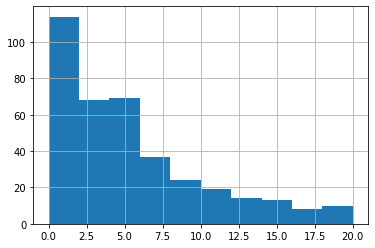

In [345]:
students.absences.hist()
students.absences.describe()

25% of students attended all studies.

## score (for math state exam)

count    370.000000
mean      52.243243
std       23.122632
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

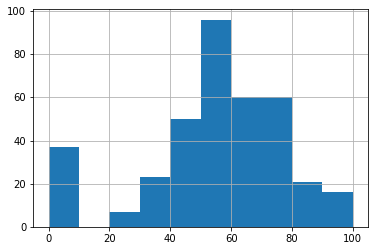

In [346]:
students.score.hist()
students.score.describe()

In [347]:
unique_count('score')

,score
50.0,54
55.0,42
0.0,37
75.0,33
65.0,30
60.0,30
40.0,27
70.0,27
45.0,23
80.0,16


In [348]:
outlier('score')

('25%: 40.0,', '75%: 70.0,', 'IQR: 30.0, ', 'Outlier bounds: [-5.0, 115.0].')

We probably won't be able to use NaN and zero values in futher analysis so let's filter them:

In [349]:
students.score.fillna(0, inplace=True)

In [350]:
students = students.loc[students['score'] > 0]

And look at the distribution again. Average score equaled 58.

count    333.000000
mean      58.048048
std       16.008397
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

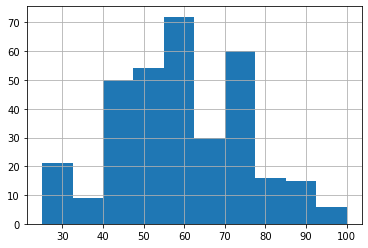

In [351]:
students.score.hist()
students.score.describe()

# Nominative variables: number of unique values

Let's see, how many unique values are there in text columns (including NaN values):

In [352]:
string_columns = students.select_dtypes(include=['object'])
number_columns = students.select_dtypes(include=['int64', 'float'])
list(string_columns)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [353]:
pd.DataFrame(string_columns.nunique(dropna=False))

,0
school,2
sex,2
address,3
famsize,3
Pstatus,3
Mjob,6
Fjob,6
reason,5
guardian,4
schoolsup,3


So there are from 2 to 5 unique values in all text columns, excluding NaN values.

# Prepare data for modeling

Let's check the names of values in text columns:

In [354]:
unique_count('school')

,school
GP,293
MS,40


In [355]:
unique_count('sex')

,sex
F,167
M,166


In [356]:
unique_count('address')

,address
U,248
R,71
NaN,14


In [357]:
unique_count('famsize')

,famsize
GT3,214
LE3,97
NaN,22


In [358]:
unique_count('Pstatus')

,Pstatus
T,269
NaN,34
A,30


In [359]:
unique_count('Mjob')

,Mjob
other,109
services,81
teacher,50
at_home,48
health,30
NaN,15


In [360]:
unique_count('Fjob')

,Fjob
other,168
services,81
NaN,31
teacher,24
health,15
at_home,14


In [361]:
unique_count('reason')

,reason
course,117
reputation,90
home,79
other,32
NaN,15


In [362]:
unique_count('guardian')

,guardian
mother,212
father,76
NaN,28
other,17


In [363]:
unique_count('schoolsup')

,schoolsup
no,279
yes,45
NaN,9


In [364]:
unique_count('famsup')

,famsup
yes,185
no,116
NaN,32


In [365]:
unique_count('paid')

,paid
no,163
yes,135
NaN,35


In [366]:
unique_count('activities')

,activities
yes,166
no,155
NaN,12


In [367]:
unique_count('nursery')

,nursery
yes,257
no,64
NaN,12


In [368]:
unique_count('higher')

,higher
yes,303
NaN,18
no,12


In [369]:
unique_count('internet')

,internet
yes,257
no,48
NaN,28


In [370]:
unique_count('romantic')

,romantic
no,211
yes,94
NaN,28


There are no misprints in text columns. Let's replace NaN values with no_data

In [371]:
students.fillna('no_data', inplace=True)

And check for any NaN values missed:

In [372]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      333 non-null    object 
 1   sex         333 non-null    object 
 2   age         333 non-null    int64  
 3   address     333 non-null    object 
 4   famsize     333 non-null    object 
 5   Pstatus     333 non-null    object 
 6   Medu        333 non-null    float64
 7   Fedu        333 non-null    float64
 8   Mjob        333 non-null    object 
 9   Fjob        333 non-null    object 
 10  reason      333 non-null    object 
 11  guardian    333 non-null    object 
 12  traveltime  333 non-null    float64
 13  studytime   333 non-null    float64
 14  failures    333 non-null    float64
 15  schoolsup   333 non-null    object 
 16  famsup      333 non-null    object 
 17  paid        333 non-null    object 
 18  activities  333 non-null    object 
 19  nursery     333 non-null    o

# Numeric variables: correlation analysis and selection of correlating columns

Let's look into correlation between numerical variables of our dataset:

In [373]:
list(number_columns)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

In [374]:
correlation = number_columns.corr()

In [375]:
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.145052,-0.136764,0.111751,-0.002338,0.225494,0.065996,0.021210,0.136172,-0.049595,0.210625,-0.131772
Medu,-0.145052,1.000000,0.578630,-0.167757,0.089916,-0.214214,-0.010963,0.033363,0.064263,-0.038337,0.039076,0.200044
Fedu,-0.136764,0.578630,1.000000,-0.136776,-0.013161,-0.278510,-0.020055,-0.023413,0.035831,0.003714,-0.044436,0.126571
traveltime,0.111751,-0.167757,-0.136776,1.000000,-0.095205,0.103190,-0.043000,-0.000054,0.036265,-0.017910,-0.031737,-0.071758
studytime,-0.002338,0.089916,-0.013161,-0.095205,1.000000,-0.146799,0.036297,-0.142141,-0.015562,-0.084900,-0.085920,0.142033
failures,0.225494,-0.214214,-0.278510,0.103190,-0.146799,1.000000,0.026715,0.124511,0.112099,0.067309,0.164310,-0.277779
famrel,0.065996,-0.010963,-0.020055,-0.043000,0.036297,0.026715,1.000000,0.145248,0.033213,0.111082,-0.087696,0.043361
freetime,0.021210,0.033363,-0.023413,-0.000054,-0.142141,0.124511,0.145248,1.000000,0.274203,0.067558,0.089765,0.001679
goout,0.136172,0.064263,0.035831,0.036265,-0.015562,0.112099,0.033213,0.274203,1.000000,0.008205,0.131444,-0.159093
health,-0.049595,-0.038337,0.003714,-0.017910,-0.084900,0.067309,0.111082,0.067558,0.008205,1.000000,-0.012585,-0.083535


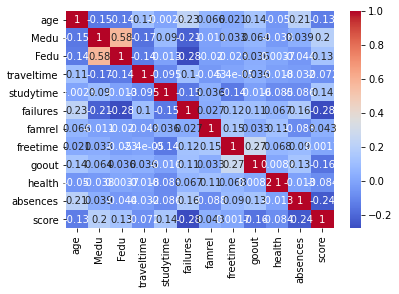

In [376]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

There are no correlating numerical variables so we will leave them all.

# Nominative variables: analyzing and choosing those, which probably influence the predicted value (the score)

In [377]:
list(string_columns)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Let's use the Student's t-test to check for a statistical difference in distribution of scores by nominative variables. Let's check the null hypothesis that the distribution of scores by different parameters are the same:

In [131]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

There is statistically significant difference for column sex
There is statistically significant difference for column address
There is statistically significant difference for column Mjob
There is statistically significant difference for column schoolsup


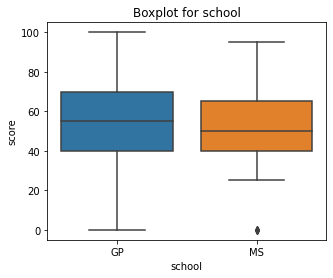

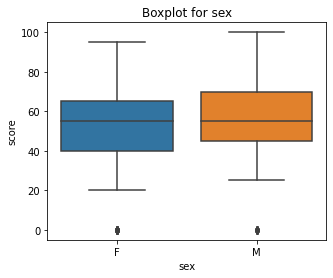

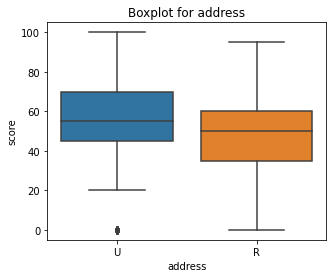

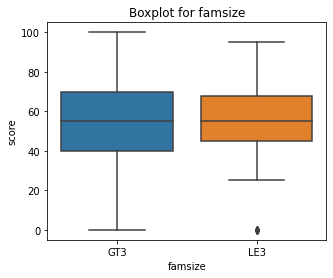

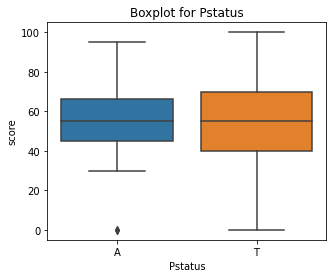

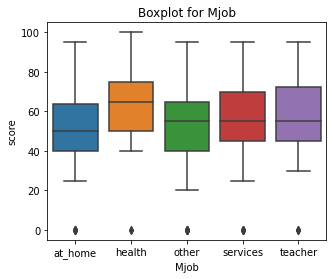

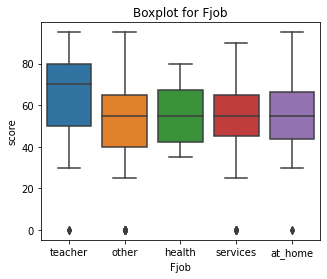

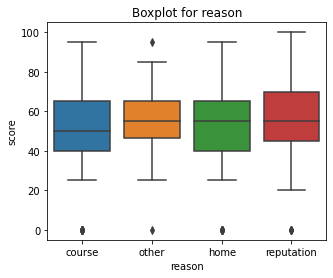

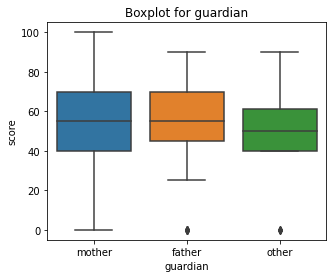

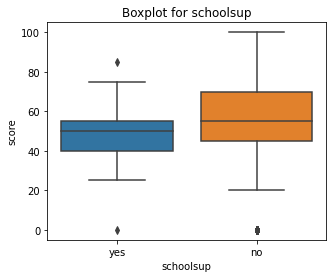

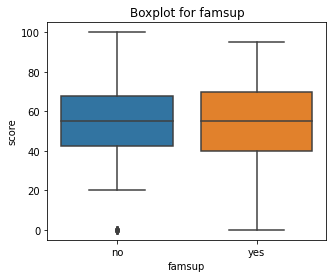

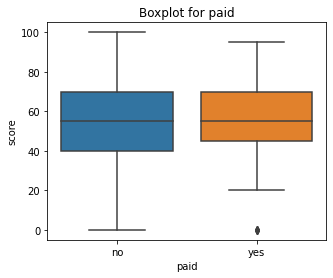

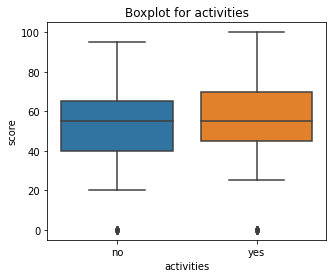

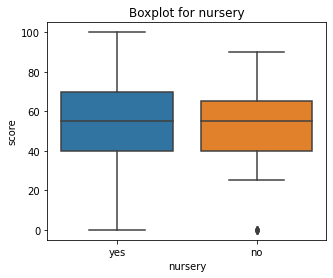

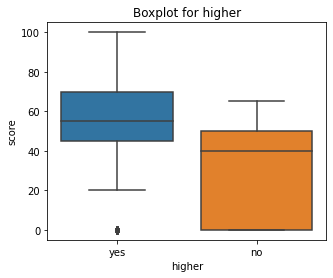

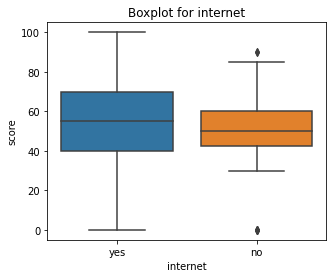

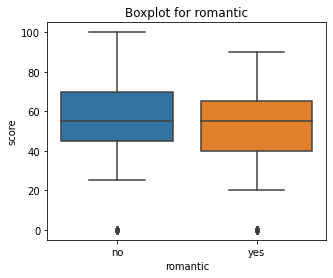

In [153]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

There are 4 parameters with significant differences: sex, address, Mjob, schoolsup. Let's leave these variables for futher modeling. Finally there are 15 important variables that can probably influence the scores of students: 
- sex
- address
- Mjob
- schoolsup
- age
- Medu
- Fedu
- traveltime
- studytime
- failures
- famrel
- freetime
- goout
- health
- absences

In [134]:
students_for_model = students.loc[:, ['sex', 'address', 'Mjob', 'schoolsup', 'age', 'Medu', 'Fedu', 'traveltime',
                                      'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']]
students_for_model.head()

,sex,address,Mjob,schoolsup,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences
0,F,U,at_home,yes,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0
1,F,U,at_home,no,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0
2,F,U,at_home,yes,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0
3,F,U,health,no,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0
4,F,U,other,no,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0


# Conclusions about data quality and variables, which will be used for futher modeling

So finalizing the EDA of social and demographic characteristics of students, which have influence on their math scores, the following conclusions can be made:

- most of columns were filled properly with data, there were empty values in almost all columns, but the number of such values was rather low;
- outliers were found just in 3 numerical columns: Fedu, famrel and absences. The outlying values were deleted;
- 0 and NaN values were found in score column, and also were deleted;
- the empty values were filled by median values in numerical columns (except failures - filled with most common value) and by "no_data" - in nominative columns;
- no correlation was found between numerical columns of dataset, so they were all left for futher modeling; 
- important nominative parameters, which will be included in futher modeling are sex, address, Mjob and schoolsup.